In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:

import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import os
import librosa
import librosa.display
import glob
import skimage

In [7]:
#Using Librosa to analyse random sound sample - SPECTOGRAM
dat1, sampling_rate1 = librosa.load('/content/drive/MyDrive/data (1)/coughs/fsd_26.wav')
dat2, sampling_rate2 = librosa.load('/content/drive/MyDrive/data (1)/not_coughs/audioset_10.wav')

In [8]:
#pip install pydub ffmpeg-python
cough = '/content/drive/MyDrive/data (1)/coughs/fsd_26.wav'
non_cough = '/content/drive/MyDrive/data (1)/not_coughs/audioset_10.wav'


In [9]:
!pip install pydub
from pydub import AudioSegment
import IPython
path = cough
IPython.display.Audio(path)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

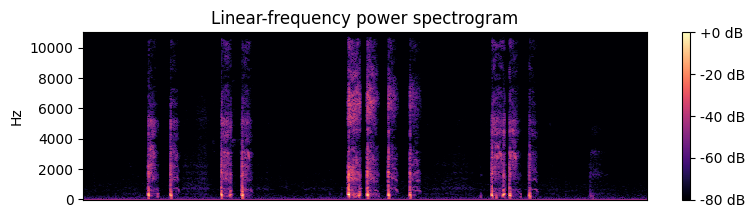

In [10]:
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat1)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

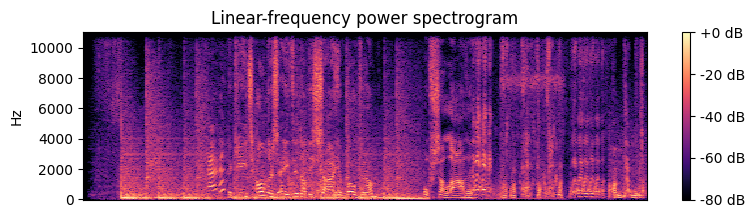

In [11]:
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat2)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [15]:
dat1, sampling_rate1 = librosa.core.load('/content/drive/MyDrive/data (1)/coughs/fsd_26.wav')
arr = librosa.feature.melspectrogram(y=dat1, sr=sampling_rate1)
arr.shape

(128, 603)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

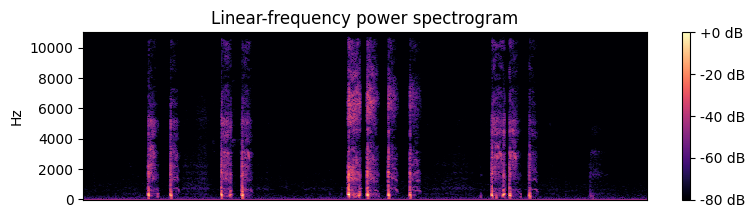

In [16]:
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat1)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [14]:
h = pd.DataFrame(arr.T)
h

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,5.088348e-11,1.188221e-10,1.196820e-10,1.600754e-10,3.124125e-10,1.830767e-10,1.261266e-10,2.212669e-10,3.551577e-10,2.270088e-10,...,3.188013e-10,2.335327e-10,1.868246e-10,3.035084e-10,3.261368e-10,4.145277e-10,6.418000e-10,6.323848e-10,5.784650e-10,2.159618e-11
1,8.563403e-08,1.406255e-07,8.863027e-07,1.652676e-06,1.655484e-06,1.021220e-06,5.993281e-07,6.255926e-07,2.017610e-07,2.676868e-07,...,1.146355e-08,8.763156e-09,3.795229e-09,3.916445e-09,2.914852e-09,2.172664e-09,3.531799e-09,1.646493e-09,6.786374e-10,7.776726e-11
2,2.067024e-06,2.215825e-06,7.020662e-06,1.559300e-05,8.343418e-06,7.409590e-06,4.162068e-06,3.088800e-05,1.897488e-05,8.015890e-06,...,2.674083e-07,1.710120e-07,1.141863e-07,9.755158e-08,1.162393e-07,7.539292e-08,1.053991e-07,5.389131e-08,1.428927e-08,2.765983e-09
3,7.917693e-06,5.526812e-06,1.848803e-05,1.990415e-04,1.410647e-04,1.408773e-05,1.886317e-04,8.214326e-04,2.494411e-04,2.970647e-04,...,1.135028e-06,9.745889e-07,1.401991e-06,1.125178e-06,5.565763e-07,4.389914e-07,5.591103e-07,3.331923e-07,9.458307e-08,1.245772e-08
4,3.564913e-05,3.301064e-05,2.307119e-04,1.619649e-03,6.389886e-04,1.804007e-04,2.159002e-03,8.476635e-03,2.557264e-03,1.208044e-03,...,3.937776e-06,4.811125e-06,4.484199e-06,3.621258e-06,3.327009e-06,1.872570e-06,1.596832e-06,1.803406e-06,1.071212e-06,1.458132e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,7.343561e-03,1.525274e-02,1.059329e-01,4.156234e+00,1.978381e+01,9.468642e+00,2.732776e+00,3.982775e+00,1.272145e+01,7.058286e+01,...,1.567549e-01,1.647775e-01,2.012949e-01,2.659635e-01,1.367241e-01,9.344116e-02,5.704216e-02,4.636798e-02,1.720928e-02,1.325898e-03
427,5.328259e-03,2.121481e-02,2.105195e-01,1.214576e+00,5.354952e+00,4.922764e+00,3.484156e+00,2.558064e+00,2.433519e+00,1.256470e+01,...,2.068194e-01,2.541772e-01,3.022180e-01,4.477621e-01,2.572395e-01,1.778383e-01,9.976302e-02,5.797446e-02,2.439163e-02,1.681628e-03
428,3.208685e-03,1.258529e-02,9.759272e-02,1.031464e+00,6.717606e+00,3.622323e+00,1.985659e+00,1.388720e+00,1.983004e+00,1.082137e+01,...,3.128874e-02,3.953258e-02,5.039938e-02,6.054980e-02,4.084750e-02,2.910570e-02,1.614979e-02,1.016826e-02,6.513083e-03,4.963314e-04
429,3.779056e-03,5.559602e-03,3.743770e-02,2.996623e-01,1.167410e+00,1.538568e-01,2.320624e-01,4.040369e-01,8.209043e-01,1.265210e+00,...,1.078353e-03,4.605982e-04,9.733319e-04,6.529879e-04,3.906991e-04,2.600366e-04,2.418513e-04,7.385836e-04,6.351731e-04,5.038649e-05


In [ ]:
import glob
cough_list = glob.glob("/content/drive/MyDrive/data (1)/coughs/fsd_26.wav")
not_cough_list = glob.glob("/content/drive/MyDrive/data (1)/not_coughs/audioset_10.wav")

cough_df = pd.DataFrame(columns=['path','type'])
not_cough_df = pd.DataFrame(columns=['path','type'])
cough_df['path'] = cough_list
not_cough_df['path'] = not_cough_list
cough_df['type'] = 1
not_cough_df['type'] = 0
files_data = pd.concat([cough_df, not_cough_df], ignore_index=True)

In [ ]:
files_data

,path,type
0,/content/drive/MyDrive/data (1)/not_coughs/aud...,1
1,/content/drive/MyDrive/data (1)/not_coughs/aud...,0


In [ ]:
files_data[files_data['type'] == 1].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    1 non-null      object
 1   type    1 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 24.0+ bytes


In [ ]:
feature = []
label = []

def parser(data):

    for i in range(len(data)):
        file_name = data['path'][i]

        X, sample_rate = librosa.load(file_name)

        mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
        feature.append(mels)
        label.append(data['type'][i])
    return [feature, label]

In [ ]:
temp = parser(files_data)

In [ ]:
temp = parser(files_data)

features = np.array(temp[0])
labels = np.array(temp[1])


df_describe = pd.DataFrame(features)
df_describe['label'] = labels

df_describe.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,label
0,13.00748,78.343269,29.157774,29.771025,73.890732,42.146603,26.994644,32.075867,24.952513,17.097174,...,0.125455,0.137417,0.106301,0.081713,0.058215,0.052553,0.043874,0.024357,0.002042,1
1,13.00748,78.343269,29.157774,29.771025,73.890732,42.146603,26.994644,32.075867,24.952513,17.097174,...,0.125455,0.137417,0.106301,0.081713,0.058215,0.052553,0.043874,0.024357,0.002042,0
2,13.00748,78.343269,29.157774,29.771025,73.890732,42.146603,26.994644,32.075867,24.952513,17.097174,...,0.125455,0.137417,0.106301,0.081713,0.058215,0.052553,0.043874,0.024357,0.002042,1
3,13.00748,78.343269,29.157774,29.771025,73.890732,42.146603,26.994644,32.075867,24.952513,17.097174,...,0.125455,0.137417,0.106301,0.081713,0.058215,0.052553,0.043874,0.024357,0.002042,0


In [ ]:

df = pd.DataFrame(data=features, index=[i for i in range(features.shape[0])], columns=['f'+str(i) for i in range(features.shape[1])])

In [ ]:
df.to_csv(index=False)

data = df_describe.values
X_ = data[:, 0]
Y = data[:, 1]
print(X_.shape, Y.shape)
X = np.empty([len(df_describe.columns), 128])

(4,) (4,)


In [ ]:
df = pd.DataFrame(data=features, index=[i for i in range(features.shape[0])], columns=['f'+str(i) for i in range(features.shape[1])])

data = df_describe.values
X = data[:, :-1]
Y = data[:, -1]
print(X.shape, Y.shape)

(4, 128) (4,)


In [ ]:
Y = to_categorical(Y)

In [ ]:
df_describe = pd.DataFrame(features)
df_describe['label'] = labels

df_describe.head()

In [ ]:
X = df_describe.drop(columns=['label'])
y = df_describe['label']


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense, Dropout
from keras.utils import to_categorical


X = df_describe.drop(columns=['label'])
y = df_describe['label']

y = to_categorical(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))


model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(y.shape[1], activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5000 - loss: 0.6305 - val_accuracy: 0.0000e+00 - val_loss: 0.8701
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step - accuracy: 0.5000 - loss: 0.8071 - val_accuracy: 0.0000e+00 - val_loss: 0.8643
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.5000 - loss: 0.8335 - val_accuracy: 0.0000e+00 - val_loss: 0.8445
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.0000e+00 - loss: 0.8212 - val_accuracy: 0.0000e+00 - val_loss: 0.8315
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.5000 - loss: 0.6719 - val_accuracy: 0.0000e+00 - val_loss: 0.8201
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.5000 - loss: 0.7577 - val_accuracy: 0.0000e+00 - val_loss: 0.8086
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5000 - loss: 0.7108 - val_accuracy: 0.0000e+00 - val_loss: 0.7963
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.0000e+00 - loss: 0.8458 - val_accuracy